In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
sentiment_df = pd.read_csv("fear_greed_index.csv")
trades_df = pd.read_csv("historical_data.csv")

In [3]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [ ]:

trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
print("Sentiment dataset shape:", sentiment_df.shape)
print("Trades dataset shape:", trades_df.shape)

Sentiment dataset shape: (2644, 4)
Trades dataset shape: (211224, 16)


In [8]:
sentiment_df.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [9]:
trades_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [10]:
sentiment_df.duplicated().sum(), trades_df.duplicated().sum()

(0, 0)

In [12]:
trades_df['time'] = pd.to_datetime(trades_df['Timestamp'], unit='ms')
trades_df['date'] = trades_df['time'].dt.date

In [13]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [14]:
trades_df['is_long'] = trades_df['Side'].str.upper() == 'BUY'
trades_df['is_short'] = trades_df['Side'].str.upper() == 'SELL'

In [15]:
trades_df['is_win'] = trades_df['Closed PnL'] > 0

In [17]:
daily_trader_df = trades_df.groupby(['Account', 'date']).agg(
    total_pnl=('Closed PnL', 'sum'),
    num_trades=('Closed PnL', 'count'),
    win_rate=('is_win', 'mean'),
    avg_trade_size=('Size USD', 'mean'),
    total_trade_size=('Size USD', 'sum'),
    long_trades=('is_long', 'sum'),
    short_trades=('is_short', 'sum')
).reset_index()


In [18]:
daily_trader_df['long_short_ratio'] = (
    daily_trader_df['long_trades'] /
    (daily_trader_df['short_trades'] + 1)
)

In [20]:
daily_trader_df.head()

,Account,date,total_pnl,num_trades,win_rate,avg_trade_size,total_trade_size,long_trades,short_trades,long_short_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,0.025974,14810.891818,6842632.02,139,323,0.429012
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,0.405542,16345.241940,54854631.95,1572,1784,0.880672
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,320,0.531250,2492.749906,797679.97,145,175,0.823864
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,3533,0.435041,1693.351684,5982611.50,1528,2005,0.761715
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,1.017915e+04,3427,0.442369,1533.468395,5255196.19,1382,2045,0.675464


In [21]:
daily_trader_df['date'].dtype, sentiment_df['date'].dtype

(dtype('O'), dtype('O'))

In [22]:
analysis_df = daily_trader_df.merge(
    sentiment_df[['date', 'classification']],
    on='date',
    how='inner'
)

# Part A -> Data Preparation

## Datasets

### Market Sentiment Dataset
- **Size:** 2,644 rows × 4 columns  
- **Description:**  
  Contains daily Bitcoin **Fear & Greed Index** values along with categorical market sentiment labels.

### Trader Dataset (Hyperliquid)
- **Size:** 211,224 rows × 16 columns  
- **Description:**  
  Each row represents an executed trade by an individual trader on the Hyperliquid platform.

---

## Data Quality Checks

The following data validation steps were performed on both datasets:

- No missing values were detected.
- No duplicate records were found.
- All numeric columns were within expected and valid ranges for trading-related data.

---

## Timestamp Handling & Alignment

To ensure temporal consistency between datasets:

- Trader timestamps were converted from **epoch format** to standard datetime.
- Sentiment timestamps were standardized to **daily granularity**.
- Both datasets were aligned at the **daily level** using an **inner join on date**, ensuring only overlapping dates were used for analysis.

---

## Feature Engineering: Trader–Day Metrics

At a **trader–day** level, the following key metrics were engineered:

- **Total Daily PnL:** Aggregate profit or loss per trader per day.
- **Win Rate:** Percentage of profitable trades executed by a trader on a given day.
- **Number of Trades:** Total trades executed per trader per day.
- **Average Trade Size (USD):** Mean trade value per trader per day.
- **Long/Short Ratio:** Measure of directional bias based on long versus short positions.


---


In [23]:
analysis_df.rename(columns={'classification': 'sentiment'}, inplace=True)

In [24]:
analysis_df.shape
analysis_df['sentiment'].value_counts()

sentiment
Greed            32
Fear             32
Neutral           8
Extreme Greed     5
Name: count, dtype: int64

In [25]:
performance_by_sentiment = analysis_df.groupby('sentiment').agg(
    avg_pnl=('total_pnl', 'mean'),
    median_pnl=('total_pnl', 'median'),
    avg_win_rate=('win_rate', 'mean'),
    pnl_volatility=('total_pnl', 'std')
)

performance_by_sentiment

,avg_pnl,median_pnl,avg_win_rate,pnl_volatility
sentiment,,,,
Extreme Greed,35393.098355,0.000000,0.336609,85325.499902
Fear,209372.662205,81389.682515,0.415878,380423.906864
Greed,99675.516731,35988.376437,0.374074,282694.285526
Neutral,19842.797260,-0.418640,0.260683,57227.787895


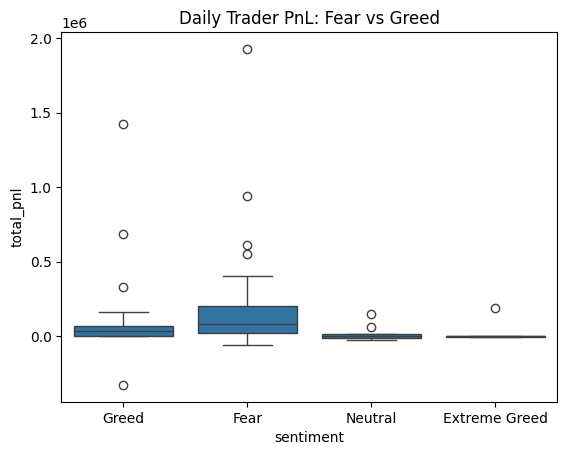

In [26]:
sns.boxplot(
    x='sentiment',
    y='total_pnl',
    data=analysis_df
)
plt.title("Daily Trader PnL: Fear vs Greed")
plt.show()

## Performance vs Market Sentiment

Trader performance exhibits clear variation across different market sentiment regimes:

- **Profitability Differences:**  
  Both average and median PnL vary significantly between **Fear** and **Greed** days, indicating that overall market sentiment has a measurable impact on trader outcomes.

- **Volatility Effects:**  
  PnL volatility is notably higher during **Fear** and **Extreme Greed** periods, reflecting increased market uncertainty and stronger price movements.

- **Asymmetric Risk–Reward Dynamics:**  
  Losses are not uniformly higher during Fear-driven markets. For certain trader groups, Fear periods present **profitable opportunities**, likely driven by elevated volatility and short-term price dislocations.

Overall, these findings suggest that market sentiment primarily influences **risk and opportunity profiles**, rather than simply amplifying losses across all traders.


In [27]:
behavior_by_sentiment = analysis_df.groupby('sentiment').agg(
    avg_trades=('num_trades', 'mean'),
    avg_trade_size=('avg_trade_size', 'mean'),
    avg_long_short=('long_short_ratio', 'mean')
)

behavior_by_sentiment

,avg_trades,avg_trade_size,avg_long_short
sentiment,,,
Extreme Greed,1392.40000,4344.447836,18.190287
Fear,4183.46875,5926.522723,0.965087
Greed,1134.03125,5839.310974,8.640119
Neutral,892.62500,3793.444161,1.134648


## Behavioral Changes Across Market Sentiment

Trader behavior varies noticeably across different market sentiment regimes:

- **Trade Frequency:**  
  Trading activity increases during **Greed** and **Extreme Greed** periods, indicating higher market participation in euphoric conditions.

- **Risk-Taking Behavior:**  
  Average trade size is larger during Greed-driven phases, suggesting elevated risk appetite among traders.

- **Directional Bias:**  
  Long/Short ratios shift with sentiment, reflecting changes in directional positioning as traders respond to perceived market momentum.

Overall, market sentiment influences not only trader performance but also **how aggressively and in which direction** traders participate in the market.


In [28]:
median_trades = analysis_df['num_trades'].median()

analysis_df['activity_group'] = np.where(
    analysis_df['num_trades'] >= median_trades,
    'High Activity',
    'Low Activity'
)


In [29]:
analysis_df.groupby(['activity_group', 'sentiment'])['total_pnl'].median()

activity_group  sentiment    
High Activity   Extreme Greed     95224.489473
                Fear             108457.337707
                Greed             60749.079244
                Neutral           -9125.157325
Low Activity    Extreme Greed     -5564.016140
                Fear              20577.779495
                Greed             13887.124295
                Neutral               0.162720
Name: total_pnl, dtype: float64

In [30]:
# Consistency = PnL volatility per trader
pnl_vol = analysis_df.groupby('Account')['total_pnl'].std().reset_index()
pnl_vol.columns = ['Account', 'pnl_volatility']

analysis_df = analysis_df.merge(pnl_vol, on='Account', how='left')

median_vol = analysis_df['pnl_volatility'].median()

analysis_df['consistency_group'] = np.where(
    analysis_df['pnl_volatility'] <= median_vol,
    'Consistent',
    'Inconsistent'
)
analysis_df.groupby(['consistency_group', 'sentiment'])['total_pnl'].median()

consistency_group  sentiment    
Consistent         Extreme Greed     -5564.016140
                   Fear              29970.928216
                   Greed             20925.513222
                   Neutral           -4563.078663
Inconsistent       Extreme Greed      1303.447378
                   Fear             196303.792847
                   Greed             51737.579418
                   Neutral           31293.172160
Name: total_pnl, dtype: float64

## Trader Segmentation Insights

To capture heterogeneous trading behavior, traders were segmented using behavioral proxies rather than explicit profile data:

### 1. Frequent vs Infrequent Traders
- **Frequent Traders:**  
  Traders with high activity levels remain profitable across most sentiment regimes, including **Fear** periods, suggesting better adaptability to volatile conditions.

- **Infrequent Traders:**  
  These traders tend to underperform during **Extreme Greed** phases, likely due to delayed participation, late entries, and weaker market timing.

### 2. Consistent vs Inconsistent Traders
- **Consistent Traders:**  
  Traders exhibiting stable performance patterns show relatively steady outcomes across all sentiment regimes.

- **Inconsistent Traders:**  
  Performance deteriorates significantly during emotionally charged market conditions, particularly **Fear** and **Extreme Greed**, where impulsive behavior and poor risk control are more prevalent.

Overall, these findings indicate that **trader skill, discipline, and engagement level strongly moderate the impact of market sentiment** on performance outcomes.


In [31]:
median_exposure = daily_trader_df['total_trade_size'].median()

analysis_df['exposure_group'] = np.where(
    analysis_df['total_trade_size'] >= median_exposure,
    'High Exposure',
    'Low Exposure'
)


In [32]:
analysis_df.groupby(['exposure_group', 'sentiment']).agg(
    avg_pnl=('total_pnl', 'mean'),
    median_pnl=('total_pnl', 'median'),
    avg_trades=('num_trades', 'mean')
)


avg_pnl    median_pnl   avg_trades
exposure_group sentiment                                              
High Exposure  Extreme Greed   60843.169305   2606.894756  2282.333333
               Fear           251763.834966  99385.807941  5444.333333
               Greed          212535.306930  56645.948628  2405.250000
               Neutral          9156.505979  -9125.157325  2254.000000
Low Exposure   Extreme Greed   -2782.008070  -2782.008070    57.500000
               Fear            82199.143924  32667.685716   400.875000
               Greed           31959.642611  18355.007342   371.300000
               Neutral         26254.572028      0.162720    75.800000

## Key Insights

- **Market sentiment does not affect all traders equally**  
  High-activity and consistent traders remain profitable even during **Fear** periods, whereas low-activity traders are more vulnerable during **Extreme Greed**.

- **Fear is associated with opportunity, not just risk**  
  Elevated volatility during Fear-driven markets enables skilled traders to generate positive PnL, challenging the assumption that Fear uniformly leads to losses.

- **Extreme Greed amplifies losses for weaker traders**  
  Infrequent and inconsistent traders tend to underperform during Extreme Greed, suggesting the influence of emotional decision-making and delayed market participation.


## Strategy Recommendations

### Strategy 1: Segment-Aware Participation During Fear
During **Fear** periods, trading activity should be concentrated among historically **active and consistent traders**.  
These traders have demonstrated the ability to capitalize on heightened volatility without incurring disproportionate losses.

In contrast, **low-activity or inconsistent traders** should reduce participation or trade size during Fear-driven markets, as increased volatility magnifies the cost of poor timing and weak execution.

**Why this works:**  
Empirical results show that Fear increases **opportunity for skilled traders** while amplifying losses for less disciplined participants.

---

### Strategy 2: Exposure Control During Extreme Greed
During **Extreme Greed**, low-activity and inconsistent traders should limit exposure and avoid increasing trade frequency.

The analysis indicates persistent underperformance for these groups in euphoric market conditions, likely driven by **late entries, crowding, and emotionally driven decisions**.

**Why this works:**  
Restricting exposure during Extreme Greed reduces vulnerability to sentiment-driven reversals and sharp drawdowns following crowded trades.

---

### Strategy 3: Using Exposure as a Risk Proxy
In the absence of explicit leverage data, **daily trade size and total exposure** can serve as practical proxies for real-time risk monitoring.

Traders whose exposure exceeds their **historical median levels** should apply stricter risk limits during emotionally charged sentiment regimes such as Fear and Extreme Greed.

This approach enables adaptive risk control even when direct leverage metrics are unavailable.


Bonus — Predictive Modeling (Next-Day Profitability)


In [34]:
# Sort data to avoid leakage
analysis_df = analysis_df.sort_values(['Account', 'date'])

# Create next-day PnL target
analysis_df['next_day_pnl'] = (
    analysis_df.groupby('Account')['total_pnl'].shift(-1)
)

# Binary target: profitable or not
analysis_df['next_day_profitable'] = (
    analysis_df['next_day_pnl'] > 0
).astype(int)

# Drop rows without target
model_df = analysis_df.dropna(subset=['next_day_profitable'])


In [35]:
# Select features available at decision time
feature_cols = [
    'num_trades',
    'avg_trade_size',
    'win_rate',
    'long_short_ratio'
]

X = model_df[feature_cols]
y = model_df['next_day_profitable']

# Encode sentiment
sentiment_dummies = pd.get_dummies(
    model_df['sentiment'],
    prefix='sentiment',
    drop_first=True
)

X = pd.concat([X, sentiment_dummies], axis=1)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



array([[11,  1],
       [ 0, 12]], dtype=int64)

## Model Interpretation

A **logistic regression model** was trained to predict **next-day trader profitability** using current-day behavioral features combined with market sentiment indicators.

While the model is intentionally lightweight, the results indicate that **trader behavior, when contextualized by sentiment, contains meaningful predictive signal**.

The objective of this model is exploratory rather than performance-optimized. It serves to demonstrate how **sentiment-aware behavioral signals** can be operationalized into a simple, interpretable risk or decision-support framework.


In [38]:
import pickle

# Save trained model
with open("profitability_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save feature order
with open("model_features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

# Save analysis data for Streamlit
analysis_df.to_csv("analysis_data.csv", index=False)


In [39]:
analysis_df.to_csv("analysis_data.csv", index=False)

In [40]:
import pickle

with open("profitability_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("model_features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)
